## Aim

In this short script, a .kml file is converted to a .geojson file using GDAL and this in Google Colab.

The kml file consists of different wards for Bangalore. Below, only the outer geometry is maintained. In other words, the geometries of the different wards are ignored.

The original kml file can be found in [OpenCity]().

## Installing GDAL

If you want to see the verbose output, you can delete the "%%capture"

In [1]:
%%capture
!apt install gdal-bin

Checking if the installation is correct:

In [2]:
!gdalinfo --version

GDAL 3.8.4, released 2024/02/08


In [3]:
!ogr2ogr --version


GDAL 3.8.4, released 2024/02/08


## Reading in the kml file

The original data are obtained from [OpenCity](https://data.opencity.in/dataset/gba-wards-delimitation-2025). A copy of this data is kept in Github [here](https://github.com/EllenB/xarray-stac-dask-PyGMT/blob/main/data/gba-369-wards-december-2025.kml). First, read in the data in Google Colab using the following command:

In [4]:
kml_file_path = 'https://github.com/EllenB/eopf/releases/download/data/gba-369-wards-december-2025.kml'


In [5]:
!wget -O gba_wards.kml \
$kml_file_path

--2026-01-30 16:15:29--  https://github.com/EllenB/eopf/releases/download/data/gba-369-wards-december-2025.kml
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/1146031685/c20aa1bf-ed9e-4efa-919b-f7fa12420e03?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-30T17%3A13%3A47Z&rscd=attachment%3B+filename%3Dgba-369-wards-december-2025.kml&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-30T16%3A13%3A07Z&ske=2026-01-30T17%3A13%3A47Z&sks=b&skv=2018-11-09&sig=3kDzbg%2Fd6l4c5Q3v7O2v1jcpf3Wxp9bhBknih%2BsyBEE%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2OTc5MDAyOSwibmJmIjoxNzY5Nzg5NzI5LCJwYXRoIjoicmV

Simple check with ogrinfo:

In [6]:
!ogrinfo '/content/gba_wards.kml'

INFO: Open of `/content/gba_wards.kml'
      using driver `LIBKML' successful.
1: wards


## Converting to a geojson file

In [7]:
!ogr2ogr \
  -f GeoJSON bangalore_boundary.geojson '/content/gba_wards.kml' \
  -dialect sqlite \
  -sql "SELECT ST_Union(geometry) AS geometry FROM wards"


## Checking the geojson file through Geopandas

In [8]:
import folium
import geopandas as gpd
from pathlib import Path

In [9]:
filepath = Path("/content/bangalore_boundary.geojson")

In [10]:
gdf = gpd.read_file(filepath)

In [11]:
gdf.head()

,geometry
0,"POLYGON ((77.54485 12.8476, 77.54473 12.84761,..."


<Axes: >

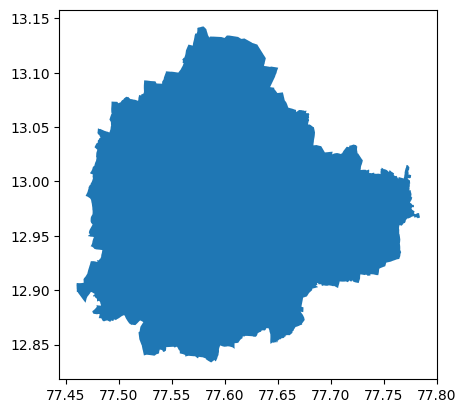

In [12]:
gdf.plot()

## Reading in the Geojson file and using Folium

In [13]:
import json
import folium

In [14]:
with open(filepath, 'r') as f:
    data = json.load(f)

In [ ]:
m = folium.Map([12.97, 77.57], zoom_start=11)
folium.GeoJson(data).add_to(m)
m


Alternatively, we could have also added the Geopandas dataframe to Folium using the following command:

In [ ]:
folium.GeoJson(gdf).add_to(m)
m